<a href="https://colab.research.google.com/github/urmilaahire26/CothonSolutionTasks/blob/main/DSTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

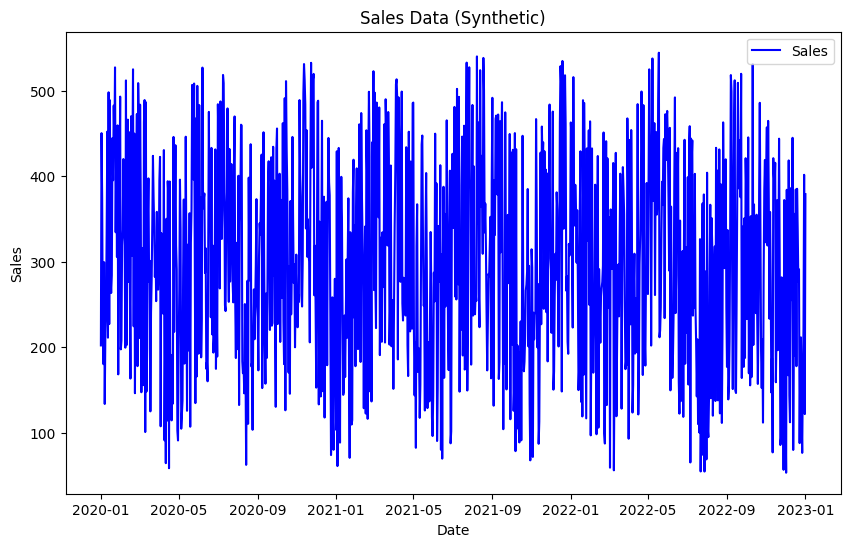

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 171.56725431954305
ARIMA MAE: 139.70875412057757
ARIMA MAPE: 94.34832514977447%


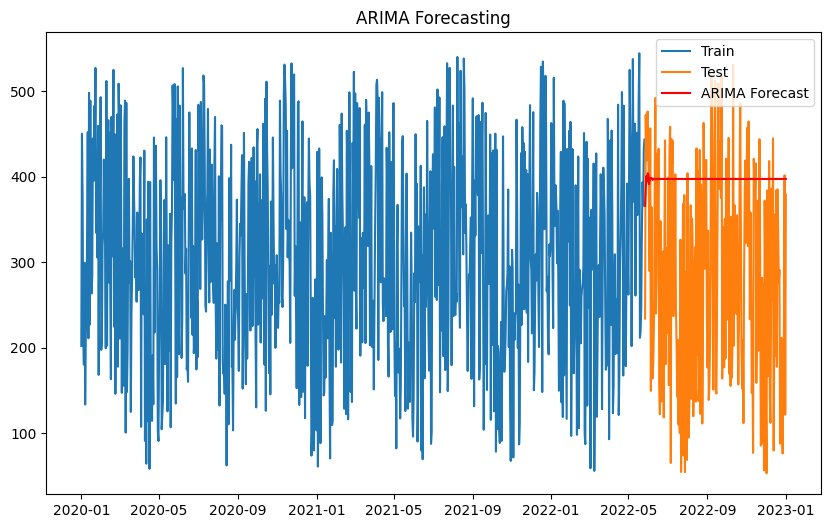


Random Forest Model Evaluation:
Random Forest RMSE: 130.53951387014553
Random Forest MAE: 112.54436386603712
Random Forest MAPE: 64.92661737879295%

XGBoost Model Evaluation:
XGBoost RMSE: 149.74368069221498
XGBoost MAE: 124.17775221418148
XGBoost MAPE: 75.22848622092687%


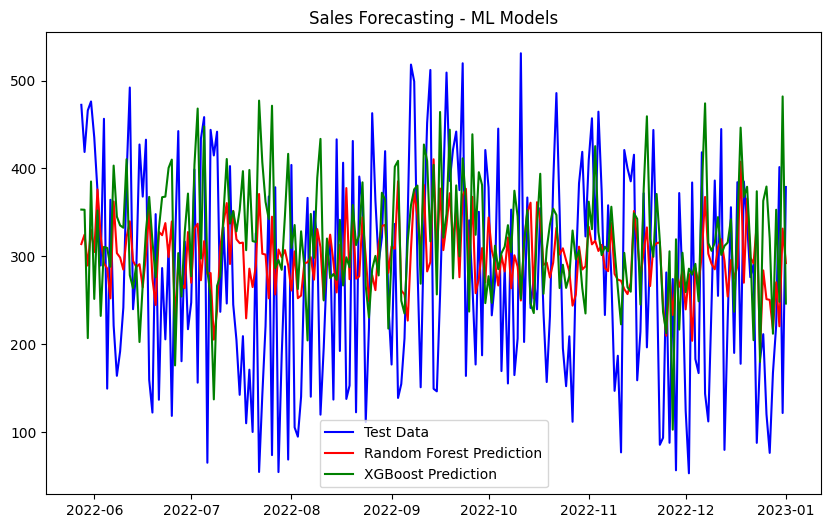

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import xgboost as xgb
import statsmodels.api as sm

# Generate synthetic sales data
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", end="2023-01-01", freq="D")
sales = np.random.randint(100, 500, size=len(date_range)) + np.sin(np.linspace(0, 50, len(date_range))) * 50

# Create a DataFrame
df = pd.DataFrame({'date': date_range, 'sales': sales})

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sales'], label="Sales", color='blue')
plt.title("Sales Data (Synthetic)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
# Step 3: Time Series Forecasting with ARIMA (AutoRegressive Integrated Moving Average)
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data for ARIMA model
df.set_index('date', inplace=True)

# Split data into training and testing
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit an ARIMA model (p=5, d=1, q=0 as an example)
model = ARIMA(train, order=(5, 1, 0))
arima_model = model.fit()

# Make predictions
predictions_arima = arima_model.forecast(steps=len(test))

# Ensure predictions_arima is an array-like structure
predictions_arima = np.array(predictions_arima)

# Evaluate ARIMA model
arima_rmse = sqrt(mean_squared_error(test['sales'], predictions_arima))  # Use the actual 'sales' column for comparison
arima_mae = mean_absolute_error(test['sales'], predictions_arima)
arima_mape = np.mean(np.abs((test['sales'] - predictions_arima) / test['sales'])) * 100

print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA MAPE: {arima_mape}%")

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, predictions_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecasting")
plt.show()


# Step 4: Machine Learning Model - Random Forest and XGBoost

# Create features for machine learning model (e.g., using lag features)
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

# Lag features for time series prediction
df['lag1'] = df['sales'].shift(1)
df['lag2'] = df['sales'].shift(2)
df['lag3'] = df['sales'].shift(3)

# Drop NaN values after creating lag features
df.dropna(inplace=True)

# Split data into training and testing for machine learning models
train_ml, test_ml = train_test_split(df, test_size=0.2, shuffle=False)

# Features and target variable
X_train_ml = train_ml[['day_of_week', 'month', 'year', 'lag1', 'lag2', 'lag3']]
y_train_ml = train_ml['sales']
X_test_ml = test_ml[['day_of_week', 'month', 'year', 'lag1', 'lag2', 'lag3']]
y_test_ml = test_ml['sales']

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_ml, y_train_ml)

# Predictions with Random Forest
rf_pred = rf_model.predict(X_test_ml)

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_ml, y_train_ml)

# Predictions with XGBoost
xgb_pred = xgb_model.predict(X_test_ml)

# Evaluate Random Forest and XGBoost
rf_rmse = sqrt(mean_squared_error(y_test_ml, rf_pred))
rf_mae = mean_absolute_error(y_test_ml, rf_pred)
rf_mape = np.mean(np.abs((y_test_ml - rf_pred) / y_test_ml)) * 100

xgb_rmse = sqrt(mean_squared_error(y_test_ml, xgb_pred))
xgb_mae = mean_absolute_error(y_test_ml, xgb_pred)
xgb_mape = np.mean(np.abs((y_test_ml - xgb_pred) / y_test_ml)) * 100

print("\nRandom Forest Model Evaluation:")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MAPE: {rf_mape}%")

print("\nXGBoost Model Evaluation:")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MAPE: {xgb_mape}%")

# Plot Predictions
plt.figure(figsize=(10, 6))
plt.plot(test_ml.index, y_test_ml, label="Test Data", color='blue')
plt.plot(test_ml.index, rf_pred, label="Random Forest Prediction", color='red')
plt.plot(test_ml.index, xgb_pred, label="XGBoost Prediction", color='green')
plt.legend()
plt.title("Sales Forecasting - ML Models")
plt.show()
